<a href="https://colab.research.google.com/github/pragneshrana/GAN/blob/master/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Generative Adversial Network


- GAN are deep neural network architecturs comprised of two neural networks, completing one against the each other.

- GAN are neural networks that are trained in an adversial manner to generate in an adversial manner to generate data mimicking some distribution

BASIC:
- Two class of models
  - Discriminative Models : It is the one that discriminates between teo different classed of data
  - Generative model : A generative model G to be trained on training data X samples from some true distribution D is the one which given some standard random distribution z produces a distribution D which is close to D according to some closeness metric.

- Mathematically, Z~Z maps to sample G(z) ~  D'















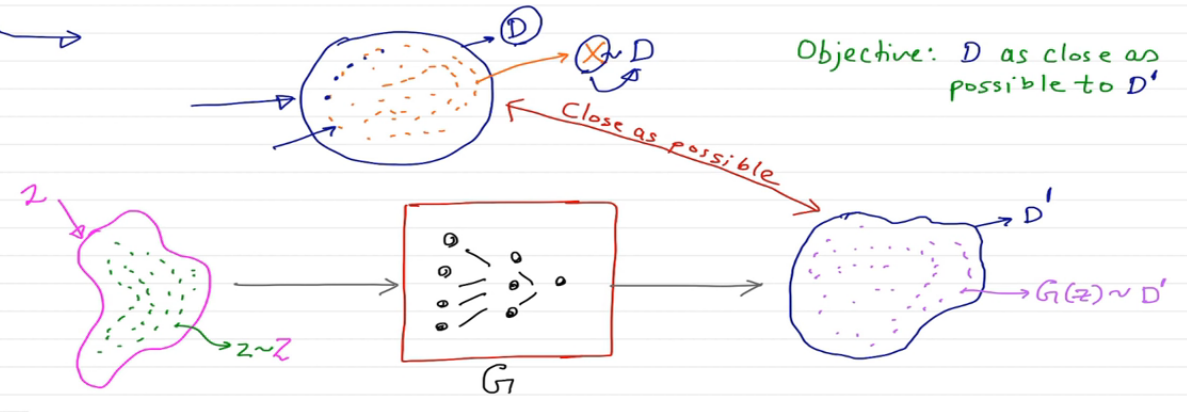

#### Architecture of GAN

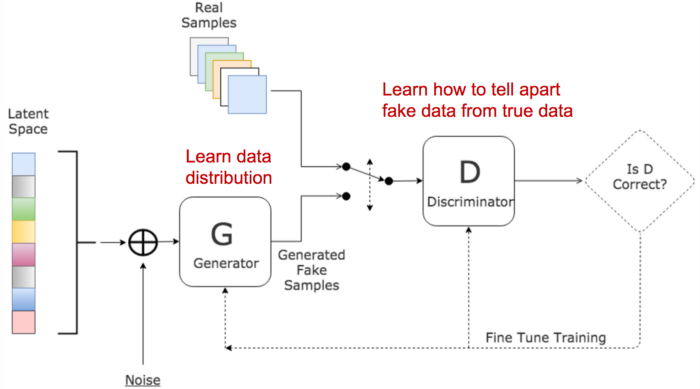

- Using latent space and noice data is generated by Generator NN
- Disctiminator checks that proposed sample is similar to original sample or not
- If it fails to do so then it corrects the weight and bias of all the neural net by back propogation

Inshort,
- **Discriminator :** 
  - Role is to distinguish between actual data and fake data
  - Model maximizes the probability by assigning the correct label to both training examples and images generated by the generator. It works as policeman, which becomes better in identification if  fake and real 

- **Generator :** 
   - Role is to create a data in such a way that it can fool the Discriminator
   - Model minimizes the probability so Discriminator can't identify that what it generates is fake. I.e the generator becomes better at creating fakes




### GAN for Face Data:

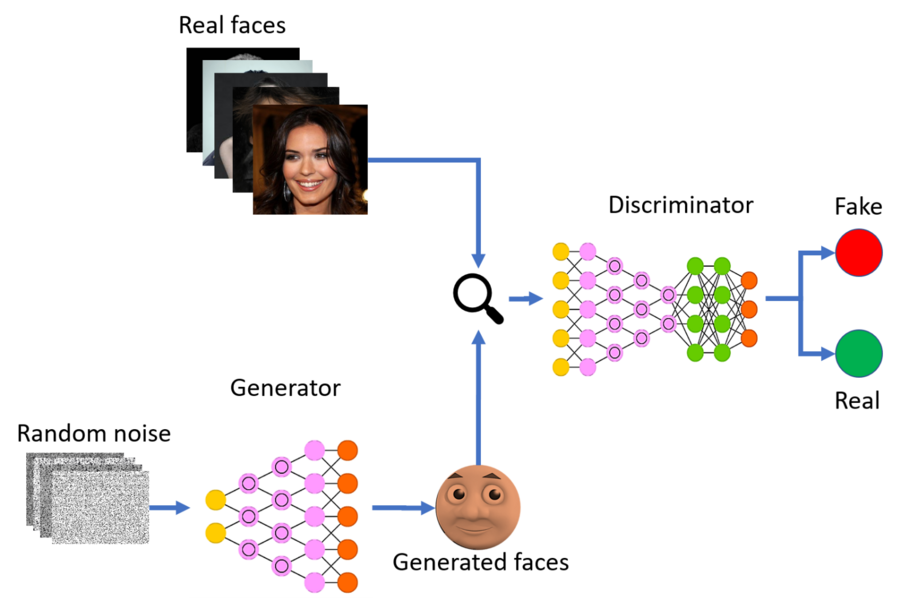

### Convention:
-  $P_{data}(x)$ - Distrbution of input data
- x instance of X; X=x
- $D(x;\theta)$ - Discriminative Probability given by classifier $\in [0,1]$
-  $P_{Z}(z)$ - Distrbution of Sample data
-  $P_{g}(x)$ - Distrbution of Transformed data which should be $\approx P_{data}(x)$
- $G(z;\theta)$ - NN that maps the distrbution of sample of $P_{Z}(z)$into the  $P_{g}(x)$ abd sample will be called $G(z)\approx x$
- $D(G(z))$ - Discriminative Probability of fake sample given by classifier $\in [0,1]$


### Loss Function

$L(\hat y - y) = (y \log \hat y + (1-y) \log (1-\hat y))$

**For discriminator,** \
The label for the data coming from $P_{data}(x)$ is y=1 and $\hat y = D(x)$ so,

$L(D(x),1) = \log(D(x)) $

and for data coming from generator the label is $y=0$ and $\hat y = D(G(z))$  in that case,

$L(D(G(z),0) = (1-0) \log(1-D(G(z)) = \log(1-D(G(z)))$

**goal of discriminator:**
To maximize the loss function of discriminator and generator,

$\max \{ \log(D(x) + \log(1-D(G(z))) \}$.....For Discriminator 


**goal of Generator:**
Task of generator is to fool the discrtiminator by $D(G(z)) = 1$.\
in case of generator it is known that, sample are fake so $y=0 \& \hat y = D(G(z))$
so, $L(D(G(z),0) = \log(1-D(G(z)))$

now term $\log(1-D(G(z)))$ can only have $D(G(z)) = 1$ if we minimize the loss function.

$\min \{ \log(D(x) + \log(1-D(G(z))) \}$.....For Generator 

**Overall Loss Function:**

$\min_G \max_D \{ \log(D(x) + \log(1-D(G(z))) \}$

This equation is written for one sample x but for all sample it can be expressed by taking expectation,

$\min_G \max_D  V(D,G) = \min_G \max_D \{ \mathbb E_{x\approx P_{data}(x)}[\log(D(x)] + \mathbb E_{z\approx P_{Z}(z)} [\log(1-D(G(z)))] \}$


## Finding the best discriminator 

**Proposotion :**
- For G fixed, the optimal discriminator D is , $D_G^* (x) = \frac{P_{data}(x)}{P_{data}(x)+P_g(x)}$

Proof:\
The training criteron for the discriminator D, given any generator G is to maximize equation.

Hence, the optimal discriminator for a given G is denoted as $D^*_G = argmax_D V(D,G)$

and, $\mathbb E _{data}[X] = \int_x x P_x(x) dx$

$D^*_G = argmax_D \bigg\{\mathbb E_{x \approx P_{data}(x)}[\log(D(x)] + \mathbb E_{z \approx P_{z}(x)}[\log(1- D(G(x))] \bigg\}  = argmax_D {V(G,D)}$

$V(G,D) = \int_x P_{data}(x) \log(D(x)) dx +  \int_z P_{Z}(z) \log(1-D(G(z))) dz$

\
But,
In probability density function of a random variable X is given as $P_X(x)$, it is possile to calculate the probability density function of some variable $Y=G(X)$.

so, By change of variable,

$P_Y(y) = P_X(G^{-1}(y)) \cdot |\frac{d (G^{-1}(y))}{d y}|$

in our case generator transform the data so,

$P_g(x) = P_z(G^{-1}(x)) \cdot |\frac{d (G^{-1}(x))}{d x}|$

now, if assume G is invertible then,
$Z = G^{-1}(x)$

so,\
$ \int_z P_{Z}(z) \log(1-D(G(z))) dz = \int_x P_z(G^{-1}(x))  \log(1-D(G(G^{-1}x))) dG^{-1}x $

$ \int_z P_{Z}(z) \log(1-D(G(z))) dz = \int_x P_z(G^{-1}(x))  \log(1-D(x)) \frac{dG^{-1}x}{dx} dx $

$ \int_z P_{Z}(z) \log(1-D(G(z))) dz = \int_x P_z(G^{-1}(x)) \frac{dG^{-1}x}{dx}  \log(1-D(x))  dx $

$ \int_z P_{Z}(z) \log(1-D(G(z))) dz = \int_x P_g(x) \log(1-D(x))  dx $

$V(G,D) = \int_x P_{data}(x) \log(D(x)) dx +  \int_z P_{Z}(z) \log(1-D(G(z))) dz$

 can be written as,
 $V(G,D) = \int_x P_{data}(x) \log(D(x)) dx +  \int_x P_g(x) \log(1-D(x))  dx$
 
   $V(G,D) = \int_x \bigg\{P_{data}(x) \log(D(x)) dx +   P_g(x) \log(1-D(x)) \bigg\}  dx$

 The optimal $D^*$ for a given G is obtained by maximizing V(G,D). so, we will find maximum of the integrand and choose the value at maximum value to be optimal value of D given G. i.e $D^*_G.$





$\frac{d}{dx} \bigg\{ P_{data}(x) \log(D(x)) dx +   P_g(x) \log(1-D(x)) \bigg \} = 0$

$\frac{P_{data}(x)}{D(x)} - \frac{P_{g}(x)}{1-D(x)} = 0$

$D_G^* (x) = \frac{P_{data}(x)}{P_{data}(x)+P_g(x)}$

For, minimum value,

$\frac{ - P_{data}(x)}{D(x)^2} - \frac{P_{g}(x)}{(1-D(x))^2} < 0$

so,
$D_G^* (x) = \frac{P_{data}(x)}{P_{data}(x)+P_g(x)}$



**In case of generator,**
The role of the generator is reverse than that of D i.e minimize
so, the optimal G that minimize the loss function occurs when $D=D^*(G)$ so, we can get ,

$G^* = argmin_G V(D^*,G)$

at this point, we must show that the optimization problem stated in A has a unique solution $G^*$ and this solution satisifes $P_g = P_{data}.$

$D_G^* (x) = \frac{P_{data}(x)}{P_{data}(x)+P_g(x)}$

$G^* = argmin_G \int_x \bigg\{P_{data}(x) \log(D^*(x))  +   P_g(x) \log(1-D^*(x)) \bigg\}  dx$

$G^* = argmin_G \int_x \bigg\{P_{data}(x) \log\bigg(\frac{P_{data}(x)}{P_{data}(x)+P_g(x)}\bigg) +   P_g(x) \log\bigg(1-\frac{P_{data}(x)}{P_{data}(x)+P_g(x)}\bigg) \bigg\}  dx$

$G^* = argmin_G \int_x \bigg\{P_{data}(x) \log\bigg(\frac{P_{data}(x)}{P_{data}(x)+P_g(x)}\bigg) +   P_g(x) \log\bigg(\frac{P_{g}(x)}{P_{data}(x)+P_g(x)}\bigg) \bigg\}  dx$

$G^* = argmin_G \int_x \bigg\{(\log 2 - \log 2) P_{data}(x) + P_{data}(x) \log\bigg(\frac{P_{data}(x)}{P_{data}(x)+P_g(x)}\bigg) + (\log 2 - \log 2) P_{g}(x)  + P_{data}(x)  P_g(x) \log\bigg(\frac{P_{g}(x)}{P_{data}(x)+P_g(x)}\bigg) \bigg\}  dx$

$G^* = argmin_G \int_x \bigg\{(\log 2 - \log 2) P_{data}(x) + P_{data}(x) \log\bigg(\frac{P_{data}(x)}{P_{data}(x)+P_g(x)}\bigg) + (\log 2 - \log 2) P_{g}(x)  + P_{data}(x)  P_g(x) \log\bigg(\frac{P_{g}(x)}{P_{data}(x)+P_g(x)}\bigg) \bigg\}  dx$

$G^* = argmin_G \int_x \bigg\{- \log 2 ( P_{data}(x) +P_{g}(x) ) + P_{data}(x) \bigg[ \log 2 + \log\bigg(\frac{P_{data}(x)}{P_{data}(x)+P_g(x)}\bigg) \bigg ]+  P_{data}(x)  \bigg[ \log 2 + \log\bigg(\frac{P_{g}(x)}{P_{data}(x)+P_g(x)}\bigg) \bigg ] \bigg\}  dx$

$G^* = argmin_G \int_x - \log 2 ( P_{data}(x) +P_{g}(x) ) +  argmin_G \int_x  P_{data}(x) \bigg[ \log 2 + \log\bigg(\frac{P_{data}(x)}{P_{data}(x)+P_g(x)}\bigg) \bigg ]+   argmin_G \int_x  P_{data}(x)  \bigg[ \log 2 + \log\bigg(\frac{P_{g}(x)}{P_{data}(x)+P_g(x)}\bigg) \bigg ]   dx$

$G^* = - \log 2 ( 1 + 1 ) +  argmin_G \int_x  P_{data}(x)   \log\bigg(\frac{P_{data}(x)}{\frac{P_{data}(x)+P_g(x)}{2}}\bigg) +   argmin_G \int_x  P_{data}(x) \log\bigg(\frac{P_{g}(x)}{\frac{P_{data}(x)+P_g(x)}{2}}\bigg)   dx$

using KL divergence,

$G^* = - \log 4 + argmin_G KL\{ P_{data}(x) || \frac{P_{data}(x)+P_g(x)}{2}\}+  argmin_G KL\{ P_{g}(x) || \frac{P_{data}(x)+P_g(x)}{2}\}  dx$

By, Jenson Shanon Divergence,

$G^* = - \log 4 + argmin_G  2 JSD \{ P_{data}(x) || \frac{P_{data}(x)+P_g(x)}{2}\}  dx$

So, JSD is 0 only when $P_g(x) = P_{data}(x) $ which minimize the argment and the value obtain is $-\log 4$.

$G^* = - \log 4 $


**Theorem :** The global minima of the criterion $G^* = argin_G V(D_G*,G)$ is achieved iff $P_g = P_{data}$ at that poiny $G^*$ value is $-log4$.

## Algorithm :

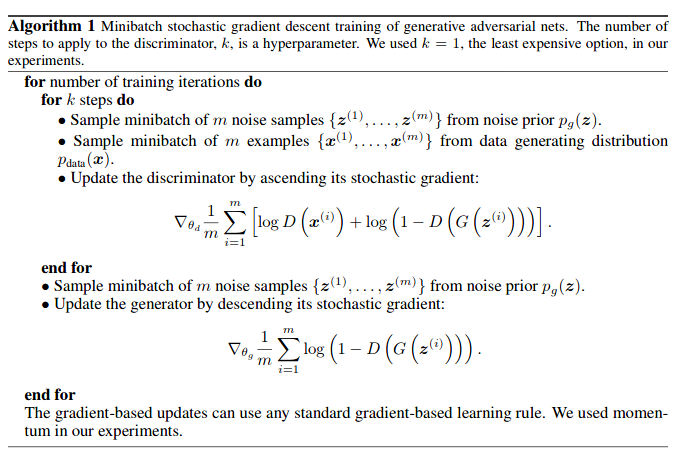

### Problems with GAN

- Vanishing Gradient Problem
- Model Collapse (Will generate same output)
- Hard to achieve nash equillibrium
- Problem with counting
- Problem with perspective 
- Problem with global structure

